In [1]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import csv
import seaborn as sns
from collections import Counter

import statistics as stats

from numpy.random import seed

import seaborn as sns; sns.set()

import os

import warnings

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind_from_stats


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

#below will help understand the accuracy of the model
#F1 score, if within 75-90 percent range, then acceptable
from sklearn.metrics import classification_report



In [2]:
#Store CSV into Dataframe

df = "./Resources/train.csv"
train_df = pd.read_csv(df,encoding='latin-1')
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#Store CSV into Dataframe

df2 = "./Resources/finaltest_df.csv"
test_df = pd.read_csv(df2,encoding='latin-1')
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
4,LP001054,Male,Yes,0.0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
284,LP002969,Male,Yes,1.0,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
285,LP002971,Male,Yes,3.0,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
286,LP002975,Male,Yes,0.0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
287,LP002986,Male,Yes,0.0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [4]:
#Check to see how many values are in the data frame
train_df.shape

(614, 13)

In [5]:
#Confirm null values
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Confirm data types
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
#Remove null values 
train_df = train_df.dropna(how='any',axis=0)

In [8]:
#lets look for duplicated Loan IDs in the data set
train_df[train_df.duplicated(['Loan_ID'], keep=False)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [9]:
train_df.to_csv(r'/Users/Brian/Desktop/Final_Project/Resources/train_df.csv', index = False)


Exploratory Data Analysis

In [10]:
train_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
#lets convert the remaining metrics that are strings to numeric values so we can run our models
Gender = {'Male':0, 'Female':1}
train_df.Gender=[Gender[item] for item in train_df.Gender]

Married = {'No':0, 'Yes':1}
train_df.Married=[Married[item] for item in train_df.Married]

Education = {'Not Graduate':0, 'Graduate':1}
train_df.Education=[Education[item] for item in train_df.Education]

Self_Employed = {'No':0, 'Yes':1}
train_df.Self_Employed=[Self_Employed[item] for item in train_df.Self_Employed]

Property_Area = {'Rural':0, 'Semiurban':1, 'Urban':2 }
train_df.Property_Area=[Property_Area[item] for item in train_df.Property_Area]

Loan_Status = {'N':0, 'Y':1}
train_df.Loan_Status=[Loan_Status[item] for item in train_df.Loan_Status]



Gender = {'Male':0, 'Female':1}
test_df.Gender=[Gender[item] for item in test_df.Gender]

Married = {'No':0, 'Yes':1}
test_df.Married=[Married[item] for item in test_df.Married]

Education = {'Not Graduate':0, 'Graduate':1}
test_df.Education=[Education[item] for item in test_df.Education]

Self_Employed = {'No':0, 'Yes':1}
test_df.Self_Employed=[Self_Employed[item] for item in test_df.Self_Employed]

Property_Area = {'Rural':0, 'Semiurban':1, 'Urban':2 }
test_df.Property_Area=[Property_Area[item] for item in test_df.Property_Area]

C:\Users\Brian\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


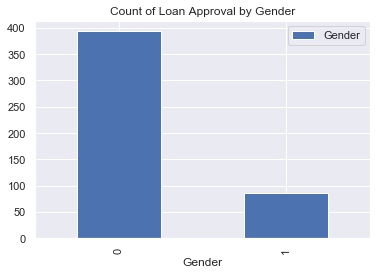

In [12]:
#Creating a dataframe grouping by the column 'Gender'
gender_df = train_df.groupby('Gender')


#Record count number of data points for each day
gender_count_df = pd.DataFrame.from_dict(gender_df['Gender'].count())
gender_count_df

#Bar Chart based off of the group series 
gender_count_chart = gender_count_df.plot(kind='bar', title= "Count of Loan Approval by Gender")


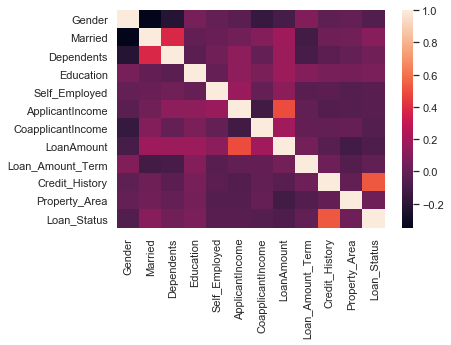

In [13]:
#checking for multicollinearity
corr = train_df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.autoscale()

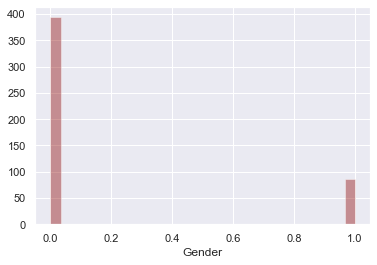

In [14]:
#Now that our values are numeric, lets use a histogram visualization to understand if this variable in our model is now evenly distributed after our changes to the data set based on our assumption
sns.distplot(train_df['Gender'],kde=False,color='darkred',bins=30)

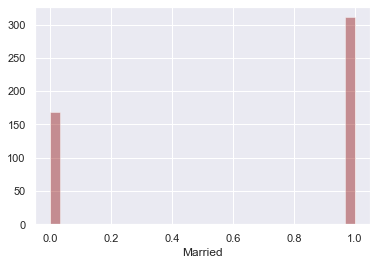

In [15]:
#Now that our values are numeric, lets use a histogram visualization to understand if this variable in our model is now evenly distributed after our changes to the data set based on our assumption
sns.distplot(train_df['Married'],kde=False,color='darkred',bins=30)

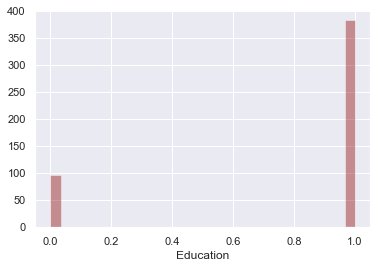

In [16]:
#Now that our values are numeric, lets use a histogram visualization to understand if this variable in our model is now evenly distributed after our changes to the data set based on our assumption
sns.distplot(train_df['Education'],kde=False,color='darkred',bins=30)

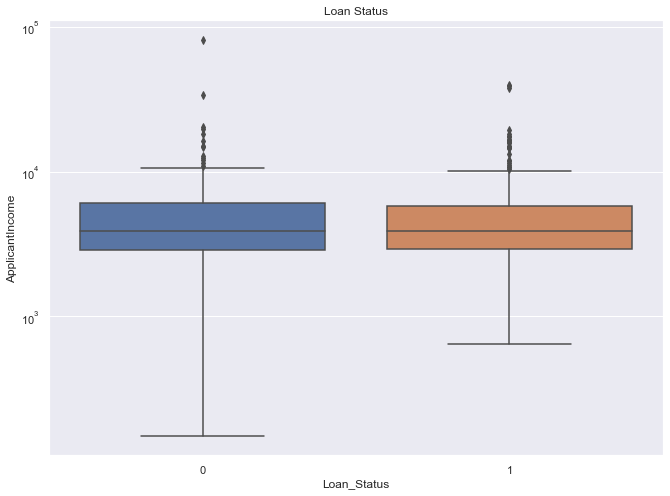

The median requested Applicant Income amount for approved contracts is nan.
The median requested Applicant Income amount for refused contracts is  nan.


In [17]:

#Create boxplot for Loan status depends on Applicant Income

plt.figure(figsize=(11,8))
loan_status_boxplot = sns.boxplot(x = 'Loan_Status' , y = 'ApplicantIncome',data = train_df)
loan_status_boxplot.set_yscale('log')
loan_status_boxplot.set_title('Loan Status')

#plt.savefig("Images/LoanStatusBoxPlot.png")
plt.show()

Approved_loans=train_df.loc[train_df['Loan_Status'].isin(['Approved'])]
Refused_loans=train_df.loc[train_df['Loan_Status'].isin(['Refused'])]

Approved_amount_median=Approved_loans['ApplicantIncome'].median()
Refused_amount_median=Refused_loans['ApplicantIncome'].median()

print(f"The median requested Applicant Income amount for approved contracts is {Approved_amount_median}.")
print(f"The median requested Applicant Income amount for refused contracts is  {Refused_amount_median}.")

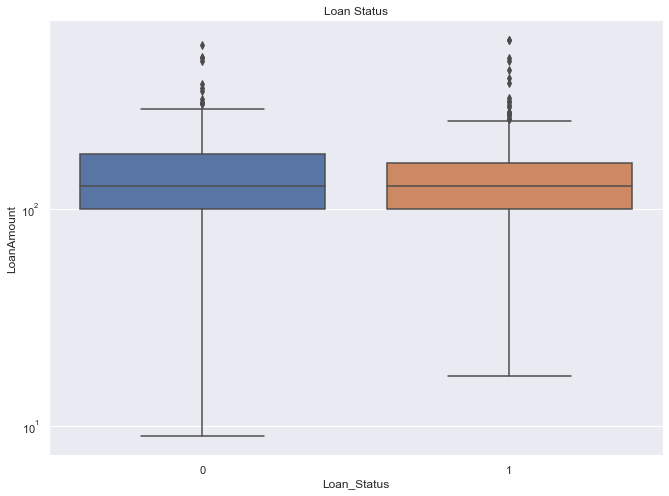

The median requested Applicant Income amount for approved contracts is nan.
The median requested Applicant Income amount for refused contracts is  nan.


In [18]:
#Create boxplot for Loan status depends on Loan Amount

plt.figure(figsize=(11,8))
loan_status_boxplot = sns.boxplot(x = 'Loan_Status' , y = 'LoanAmount',data = train_df)
loan_status_boxplot.set_yscale('log')
loan_status_boxplot.set_title('Loan Status')

# plt.savefig("Images/LoanStatusBoxPlot.png")
plt.show()

Approved_loans=train_df.loc[train_df['Loan_Status'].isin(['Approved'])]
Refused_loans=train_df.loc[train_df['Loan_Status'].isin(['Refused'])]

Approved_amount_median=Approved_loans['LoanAmount'].median()
Refused_amount_median=Refused_loans['LoanAmount'].median()

print(f"The median requested Applicant Income amount for approved contracts is {Approved_amount_median}.")
print(f"The median requested Applicant Income amount for refused contracts is  {Refused_amount_median}.")

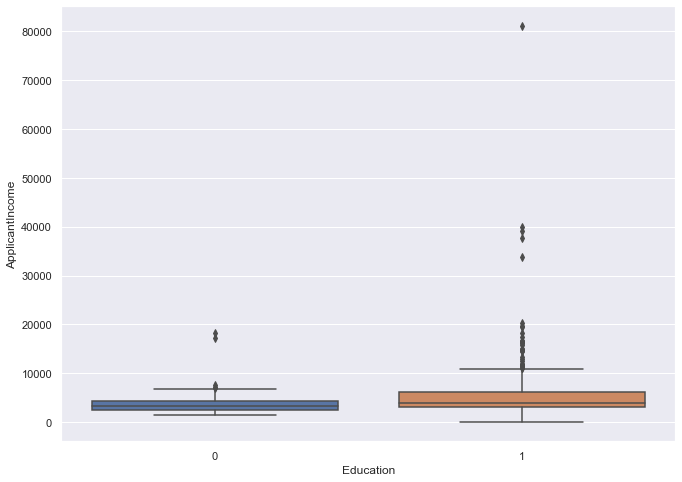

It seems that the graduates have more outliers which means that the people with huge income are most likely well educated.


In [19]:
# Create Box plot using education level against the income

plt.figure(figsize=(11,8))
sns.boxplot(x='Education',y='ApplicantIncome',data=train_df)
# plt.savefig("Images/BoxPlot.png")
plt.show()

print(f"It seems that the graduates have more outliers which means that the people with huge income are most likely well educated.")

In [20]:
#drop the loan id from the dataset, we do not need this for the machine learning models
train_df.drop('Loan_ID', axis=1, inplace=True)

C:\Users\Brian\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
#random forest machine learning model
#get the train and test split and prepared
#split data into training and test sets
y = train_df['Loan_Status']
X = train_df.drop('Loan_Status', axis=1)

# Splitting the observations into a training and a testing set for the holdout method

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=46)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

In [34]:
# Min-max scaling for neural nets and SVMs

X_train_norm = preprocessing.normalize(X_train, norm='max', axis=0)  # Normalizing across columns
X_test_norm = preprocessing.normalize(X_test, norm='max', axis=0)  # Normalizing across columns

In [35]:
#random forest model
rf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))
#pred = rf.predict(X_test)
#print(classification_report(y_test, pred))

0.8083333333333333


In [25]:
import joblib

In [26]:
filename = 'finalized_model.sav'
joblib.dump(pred, filename)

['finalized_model.sav']